In [51]:
#importing the required libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [52]:
iris = datasets.load_iris()
iris_data = iris.data #seperate training variables (sepal length, sepal width, petal length, petal width)


In [53]:
iris_labels = iris.target #what we are predicting - the classification of flowers: setosa, versicolor, verginica
iris_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [55]:
np.random.seed(22)   #randomize the data
indices=np.random.permutation(len(iris_data))
indices


array([ 10, 115,  54, 146,  63,  76,  86, 138,  64,  35, 120,  95, 130,
       109,  43, 131,  69,  99, 119,  96,  46, 141,  36,  92, 142,   2,
       129, 147, 124, 126,  30,  31,  89,  90,  55,  26,  39,  37, 139,
       108,  50,  56,  16,  42,  77,  88, 113, 104,   4,  71,  85, 145,
        15,  20,  40,  12,  33,  22, 125,  98,  51, 107,  41,  25,  18,
        49,  68,   0,  74,  57,  72,  73,  70,   5,  62, 128,  24, 137,
        61, 116,  78,  80,  97,  32,  28, 118,  79,   6,  67,  82, 148,
       149,   3, 114,  17, 143,   9,  53,  21, 101,  65, 112,  59, 140,
        48,  60,  58,  83,  87, 135,   1,  47, 123,  75,  52,  13,  94,
        11, 105, 122, 106, 110,  23, 103, 134,   7,  91,  66,  19, 121,
        38,  81,  29, 144,  27, 111, 133,   8, 127,  34,  93,  45,  14,
       136,  84, 102, 100,  44, 132, 117])

In [56]:
n_training_samples = 12
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

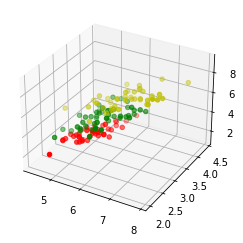

In [67]:
def new_func():
    X = []
    for iclass in range(3):
        X.append([[],[],[]])
        for i in range(len(trainset_data)):
            if trainset_labels[i] == iclass:
                X[iclass][0].append(trainset_data[i][0])
                X[iclass][1].append(trainset_data[i][1])
                X[iclass][2].append(sum(trainset_data[i][2:]))
    colors = ("r","g","y")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    for iclass in range(3):
        ax.scatter(X[iclass][0],X[iclass][1],X[iclass][2], c=colors[iclass])
    plt.show()

new_func()
                             
                                
    

In [63]:
def distance(instances1, instances2):
    instances1 = np.array(instances1)
    instances2 = np.array(instances2)
    return np.linalg.norm(instances1-instances2)

In [64]:
def get_neighbors(training_set,
                 labels,
                 test_instance,
                 k,
                 distance=distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index],dist,labels[index]))
    distances.sort(key=lambda x:x[1])
    neighbors = distances[:k]
    return(neighbors)

In [72]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]]+=1
    return class_counter.most_common(1)[0][0]
    
            

In [73]:
for i in range(n_training_samples):
    neighbors = get_neighbors(trainset_data,
                             trainset_labels,
                             testset_data[i],
                             3,
                             distance = distance)
    print("index: ", i,
         " result of vote: " ,vote(neighbors),
         "label: ", testset_labels[i],
         "data: ",testset_data[i])

index:  0  result of vote:  2 label:  2 data:  [6.1 3.  4.9 1.8]
index:  1  result of vote:  0 label:  0 data:  [4.9 3.1 1.5 0.2]
index:  2  result of vote:  1 label:  1 data:  [5.  2.3 3.3 1. ]
index:  3  result of vote:  0 label:  0 data:  [4.8 3.  1.4 0.3]
index:  4  result of vote:  0 label:  0 data:  [5.8 4.  1.2 0.2]
index:  5  result of vote:  2 label:  2 data:  [6.3 3.4 5.6 2.4]
index:  6  result of vote:  1 label:  1 data:  [5.4 3.  4.5 1.5]
index:  7  result of vote:  2 label:  2 data:  [7.1 3.  5.9 2.1]
index:  8  result of vote:  2 label:  2 data:  [6.3 3.3 6.  2.5]
index:  9  result of vote:  0 label:  0 data:  [5.1 3.8 1.9 0.4]
index:  10  result of vote:  2 label:  2 data:  [6.4 2.8 5.6 2.2]
index:  11  result of vote:  2 label:  2 data:  [7.7 3.8 6.7 2.2]
